# Lung cancer data exploration

Se realiza la importación y exploración del dataset de cáncer de pulmón (*Lung Cancer*) del archivo obtenido del repositorio de [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer) para un mayor entendimiento y la planificación de los pasos posteriores de preprocesamiento y entrenamiento del modelo de aprendizaje automático. El origen de los datos es el website *Online Lung Cancer Prediction System*. 

## Librerías

En primer lugar, se importan las librerías utilizadas en la exploración de los datos: 

In [2]:
# importación de datos y librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A continuación, se importan los datos y se imprimen las primeras filas para verificar el cargue exitoso. 

In [3]:
path = "survey lung cancer.csv" # Ruta del dataset 

archivo = pd.read_csv(path) # Importación de datos de la ruta
df = pd.DataFrame(archivo) # Convertir los datos a un pandas DataFrame

# Transformación de datos binarios numéricos a etiquetas para exploración inicial
df.loc[:, 'SMOKING':'CHEST PAIN'] = df.loc[:, 'SMOKING':'CHEST PAIN'].replace({1: False, 2: True})

df.head() # Resumen de las primeras filas del dataset. 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,False,True,True,False,False,True,False,True,True,True,True,True,True,YES
1,M,74,True,False,False,False,True,True,True,False,False,False,True,True,True,YES
2,F,59,False,False,False,True,False,True,False,True,False,True,True,False,True,NO
3,M,63,True,True,True,False,False,False,False,False,True,False,False,True,True,NO
4,F,63,False,True,False,False,False,False,False,True,False,True,True,False,False,NO


# Exploración inicial de datos

## Tipos de datos

Se llama al atributo `dtypes` para verificar el tipo de variable de cada característica en el dataset y validar que sea coherente con los datos que se muestran.  

In [4]:
# Tipos de datos de las características
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                    bool
YELLOW_FINGERS             bool
ANXIETY                    bool
PEER_PRESSURE              bool
CHRONIC DISEASE            bool
FATIGUE                    bool
ALLERGY                    bool
WHEEZING                   bool
ALCOHOL CONSUMING          bool
COUGHING                   bool
SHORTNESS OF BREATH        bool
SWALLOWING DIFFICULTY      bool
CHEST PAIN                 bool
LUNG_CANCER              object
dtype: object

Efectivamente, los tipos de datos corresponden con las características. Se evidencia que la mayoría de variables son booleanas indicando la presencia de una característica en particular. La variable de género es dicotómica con valores 'M' o 'F' para masculino y femenino respectivamente. Igualmente, la variable 'AGE', que corresponde a la edad, se representa mediante números enteros. Estas dos últimas variables son de carácter netamente descriptivo en la población. 

## Resumen estadístico

Se utiliza el método `describe()` para realizar un análisis descriptivo de cada variable mediante un bucle. 

In [5]:
# Resumen estadístico por características
for col in df:
    print(f"{df[col].describe()}\n")

count     309
unique      2
top         M
freq      162
Name: GENDER, dtype: object

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

count      309
unique       2
top       True
freq       174
Name: SMOKING, dtype: object

count      309
unique       2
top       True
freq       176
Name: YELLOW_FINGERS, dtype: object

count       309
unique        2
top       False
freq        155
Name: ANXIETY, dtype: object

count      309
unique       2
top       True
freq       155
Name: PEER_PRESSURE, dtype: object

count      309
unique       2
top       True
freq       156
Name: CHRONIC DISEASE, dtype: object

count      309
unique       2
top       True
freq       208
Name: FATIGUE , dtype: object

count      309
unique       2
top       True
freq       172
Name: ALLERGY , dtype: object

count      309
unique       2
top       True
freq       172
Name: WHEEZ

Se evidencia que la edad media de los participantes está al rededor de los 62 años, siendo el más joven de 21 años y el de mayor edad de 87 años. Las demás variables presentan datos con dos valores únicos. 

## Visualización de datos

A continuación, se presentan distintas gráficas para representar la información:

### Histograma Participación por edad.

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


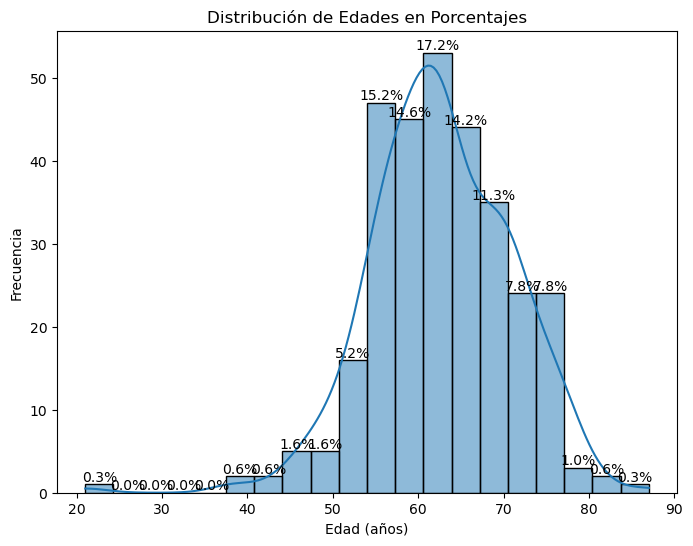

In [6]:
# Distribución de las edades de los participantes
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['AGE'], bins=20, kde=True)

# Agregar etiquetas de porcentajes
total = len(df['AGE'])
for p in ax.patches:
    percentAGE = f'{(100 * p.get_height()/total):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentAGE, (x, y), ha='center', va='bottom')

plt.title('Distribución de Edades en Porcentajes')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

Cómo se mencionó anteriormente, el histograma evidencia una prevalencia en la edad de los participantes de 62 años, con una concentración dada por la desviación estándar entre los 52 y 70 años. 

#### Histograma relación Edad vs Cáncer de Pulmón

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

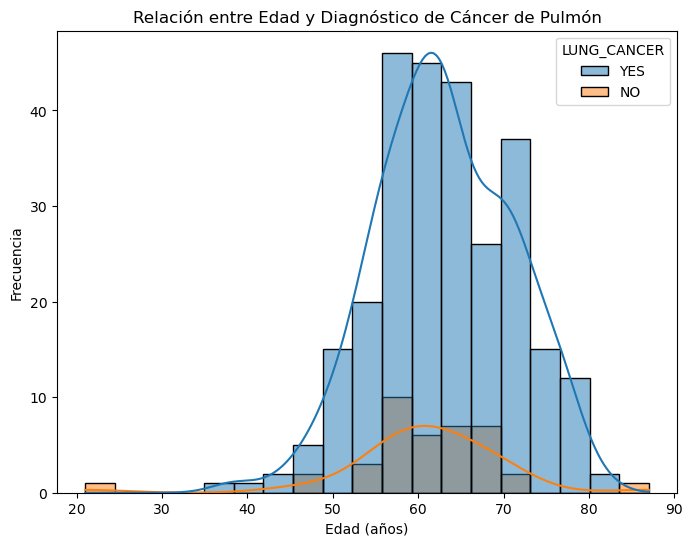

In [7]:
# Visualización de la relación entre edad y diagnóstico de cáncer de pulmón
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', hue='LUNG_CANCER', data=df, kde=True)
plt.title('Relación entre Edad y Diagnóstico de Cáncer de Pulmón')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

Se evidencia una alta prevalencia de cáncer de pulmón en la población, con cantidades considerables al rededor de la media de edad.  

### Participación por género

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


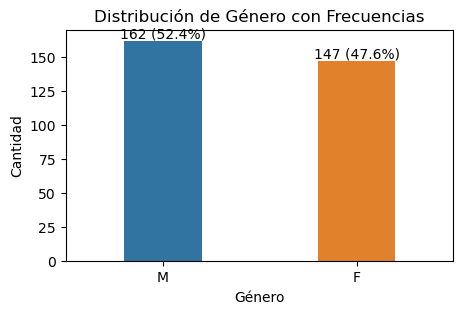

In [8]:
# Visualización de la proporción de género
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='GENDER', data=df, width=0.4)

# Agregar etiquetas de frecuencias
total = len(df['GENDER'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Distribución de Género con Frecuencias')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

La gráfica de barras presenta uan distribución de género similar en la población dividida en hombres y mujeres, con una ligera mayor participación de hombres. 

### Relación Consumo de Alcohol vs Cáncer de Pulmón

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

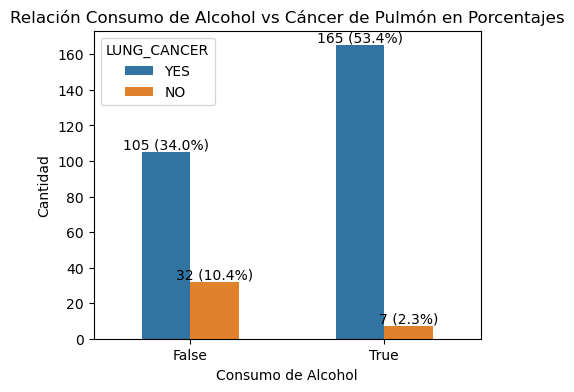

In [9]:
# Matriz de correlaión entre consuo de alcohol con cáncer de pulmón
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df, width=0.5)

# Agregar etiquetas de porcentajes
total = len(df['ALCOHOL CONSUMING'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title('Relación Consumo de Alcohol vs Cáncer de Pulmón en Porcentajes')
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Cantidad')
plt.show()

De acuerdo con la gráfica, no se evidencia que el consumo de alcohol presenta un aumento significativo en los casos de cáncer de pulmón, ya que los casos positivos son amplios en los dos grupos, lo que puede deberse a otros factores como la cantidad de casos positivos en relación a la población total. 

### Relación de género vs Cáncer de Pulmón

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

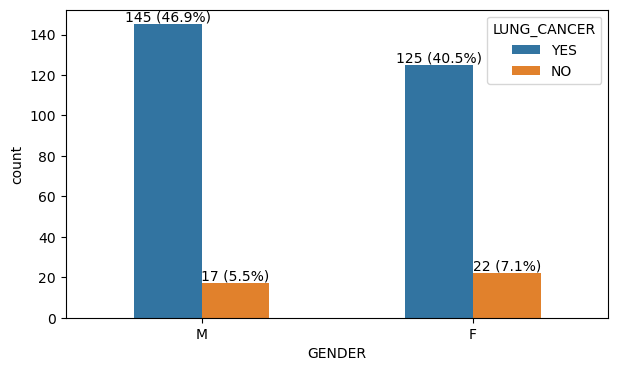

In [10]:
# Visualización de la relación entre género y diagnóstico de cáncer de pulmón
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df, width=0.5)

# Agregar etiquetas de porcentajes
total = len(df['GENDER'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height):.0f} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

Los casos de cáncer de pulmón por género presentan una distribución similar lo que se traduce en un dataset balanceado respecto a dicha variable. 

### Habito de fumar vs Cáncer de Pulmón

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

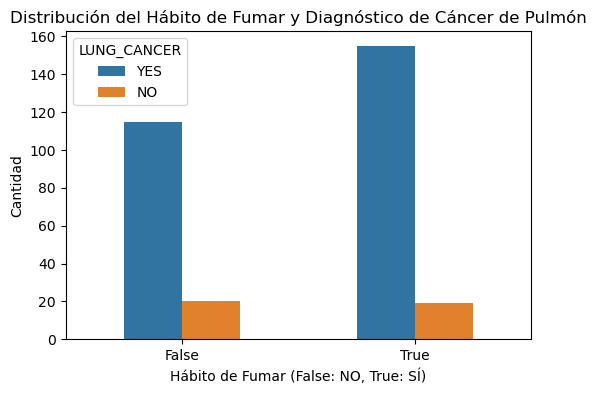

In [11]:
# Visualización de la distribución del hábito de fumar y diagnóstico de cáncer de pulmón
plt.figure(figsize=(6, 4))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df, width=0.5)
plt.title('Distribución del Hábito de Fumar y Diagnóstico de Cáncer de Pulmón')
plt.xlabel('Hábito de Fumar (False: NO, True: SÍ)')
plt.ylabel('Cantidad')
plt.show()

En cuanto al hábito de fumar, la gráfica no revela una relación significativa con los casos positivos de cáncer de pulmón, ya que se aprecia una distribución similar entre los fumadores y no fumadores respecto a la variable objetivo. 

### Datos atípicos u outliers en la característica Edad

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


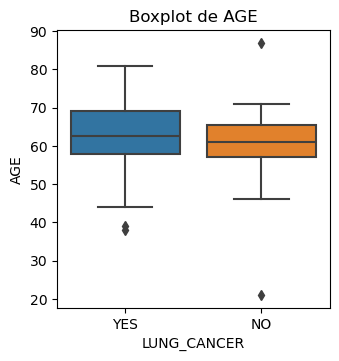

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['AGE']

# Crear subplots para cada columna
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x='LUNG_CANCER', y=column, data=df)
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

Se evidencian outliers en la edad de los participantes, diferenciados por aquellos con cáncer de pulmón de loq ue no lo padecen. La gráfica demuestra la concertación de edad entre los 58 y 70 años, tomando como poco representativos a los participantes mayores o aquellos más jóvenes.

## Correlación de variables

Se proyecta una correlación de variables por medio de Pearson, Spearman y Kendall para evaluar la interacción entre las variables. Inicialmente se establece un sistema de puntuación basado en estrellas para calificar la confianza de las correlaciones.  

In [23]:
def stars(p):
    if p < 0.0001:
        return '*****'
    elif p < 0.001:
        return '****'
    elif p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

Se establece una función para iterar por cada método de correlación y generar la matriz por cada uno. 

In [15]:
from matplotlib.patheffects import withStroke
from scipy import stats
import seaborn as sns
import itertools


def plot_correlations(dataframe, corr_methods):
    for method in corr_methods:
        stroke = withStroke(linewidth=2, foreground="black")
        corr_matrix = dataframe.corr(method=method)
        pval_matrix = dataframe.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

        # Create a mask to show only the lower triangle of the matrix
        mask = np.triu(np.ones_like(corr_matrix))
        mask2 = np.tril(np.ones_like(corr_matrix))
        stars_corr = pval_matrix * mask2 + mask
        pval_stars = stars_corr.map(stars)
        with sns.axes_style("whitegrid"):
            f, ax = plt.subplots(figsize=(12, 10))
            ax = sns.heatmap(
                corr_matrix.round(4),
                mask=mask,
                vmax=1,
                center=0,
                vmin=-1,
                square=True,
                cmap=sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True),
                linewidths=0.5,
                annot=True,
                annot_kws={"size": 12},
                fmt=".2f",
            )
            ax.set_title(f"{method.capitalize()} Correlations Matrix", fontsize=20)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

            for i, j in itertools.product(
                range(corr_matrix.shape[0]), range(corr_matrix.shape[0])
            ):
                ax.text(
                    j + 0.5,
                    i + 0.8,
                    pval_stars.iloc[i, j],
                    ha="center",
                    va="center",
                    color="white",
                    fontsize=18,
                    path_effects=[stroke],
                )

            # plt.savefig(
            #     (f"correlation_vi_{method.capitalize()}_triangular_stage.png"),
            #     dpi=300,
            #     bbox_inches="tight",
            # )
            plt.show()

Se crea una instancia de la función y se pasa como argumento el dataset y los métodos que se utilizarán. 

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


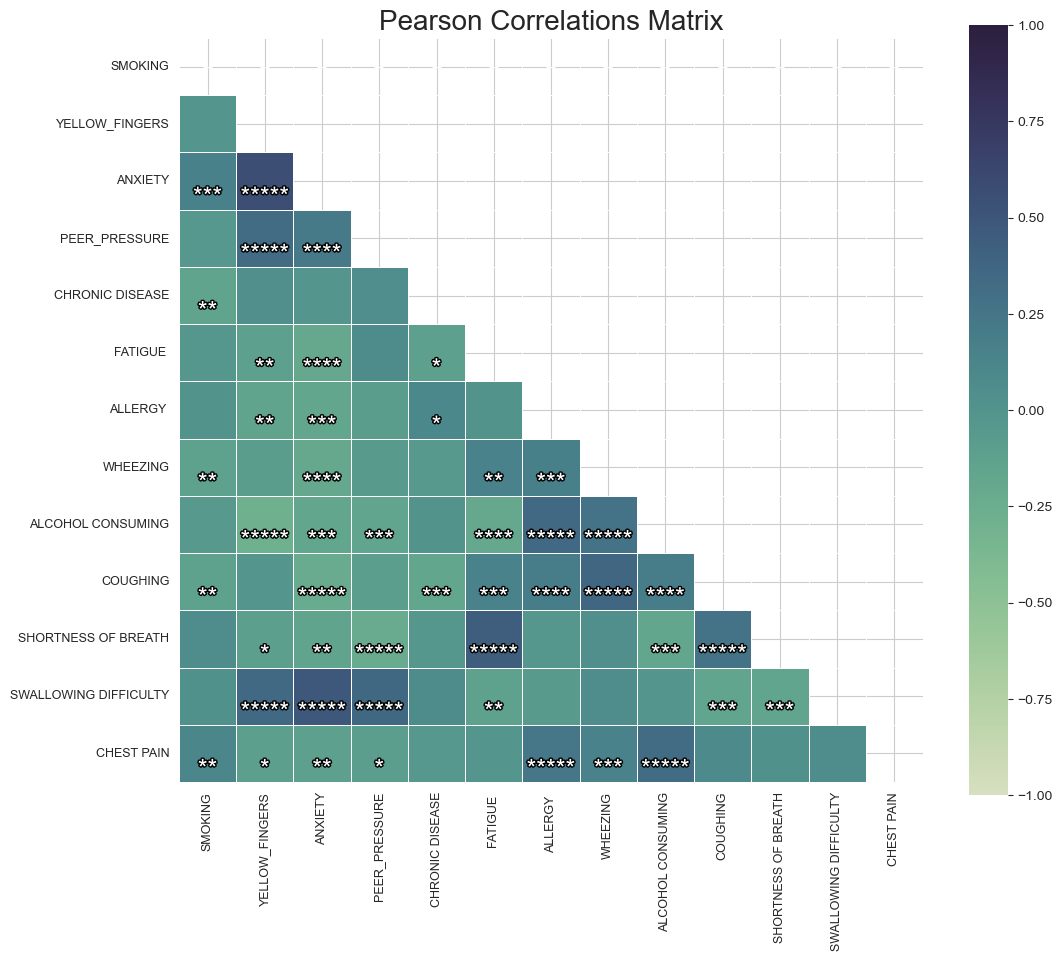

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


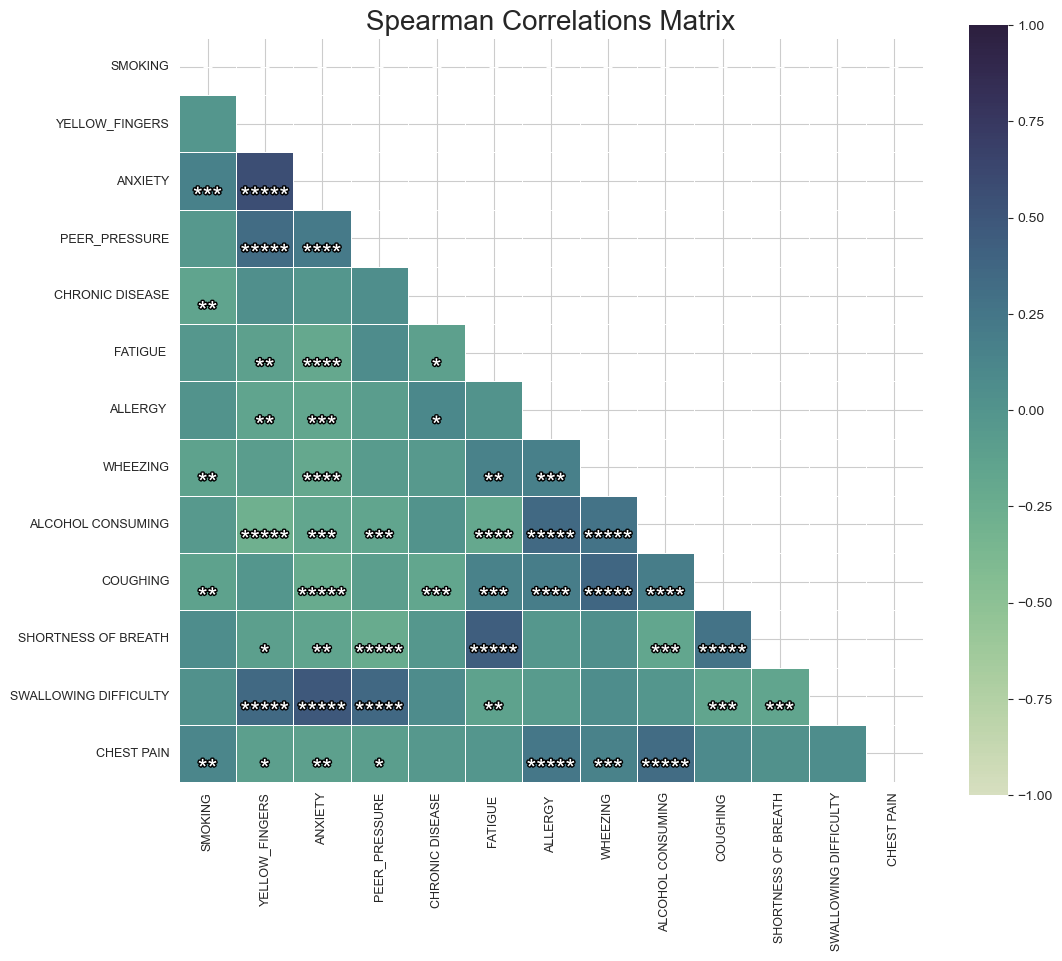

c:\Users\sebas\anaconda3\envs\UAO\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


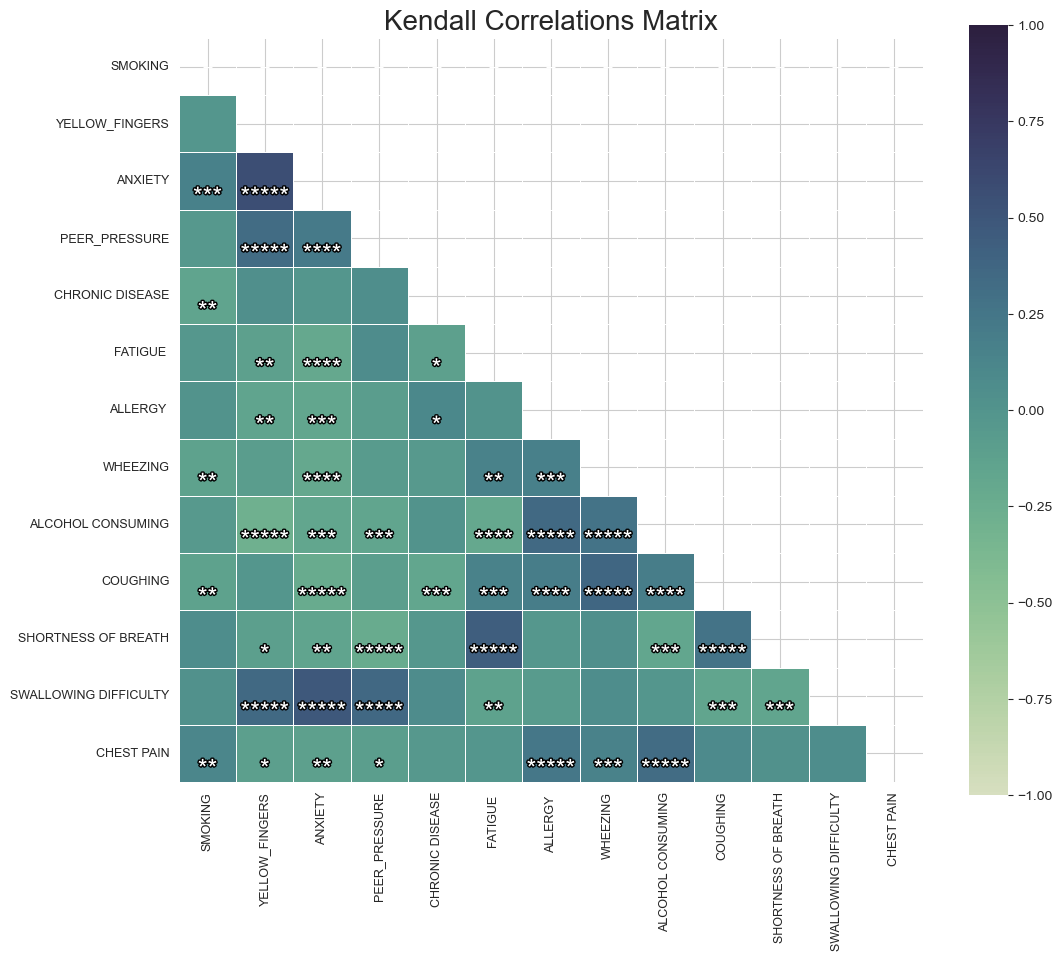

In [25]:
correlation_methods = ["pearson", "spearman", "kendall"]
numerical_features = df.select_dtypes(include=['bool']).columns

plot_correlations(df[numerical_features], correlation_methods)

Las matrices de correlación evidencian puntajes altos entre las variables `ANXIETY` y `SWALLOWING DIFFICULTY`, así como `ANXIETY` con `YELLOW_FINGERS`. Igualmente, relaciona `FATIGUE` con `SHORTNESS OF BREATH` de manera coherente. 